### Neshyba, 2023

# Entropy of Mixing

## Introduction
The *nCV* ("moles-concentration-volume") equation is

$$
n = CV \ \ \ \ (1)
$$

The *dilution* equation is

$$
C_f/C_i = V_i/V_f \ \ \ \ (2)
$$

To estimate the entropy change associated with a dilution (assuming ideal solutions), you can use

$$
\Delta S = -n_{tot}R \times ln \big({C_f \over C_i}\big) \ \ \ \ (3)
$$

The *E-ICE* ("equal initial concentrations entropy") equation for finding the entropy of mixing is

$$
\Delta S = -n_{tot}R \times [\chi_A ln(\chi_A) + \chi_B ln(\chi_B) + ...] \ \ \ \ (4)
$$

where the mole fractions are given by $\chi_A={n_A \over n_{tot}}$, etc.

## Learning Goals
1. Gain familiarity with how concentrations change with dilution.
1. Gain familiarity with the entropy changes attending dilution and mixing of solutions.

In [1]:
import pint; from pint import UnitRegistry; AssignQuantity = UnitRegistry().Quantity
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

In [2]:
%matplotlib notebook

In [3]:
R = AssignQuantity(8.314,'J/mol/K')

### Finding moles of solute using the *nCV* equation
Calculate the number of moles of solute in $20 \ mL$ of a $0.5$ <u>M</u> solution.

In [4]:
### BEGIN SOLUTION
C = AssignQuantity(0.5,'mol/L')
V = AssignQuantity(20,'mL')
n = C*V
n.ito('mol')
print(n)
### END SOLUTION

0.01 mole


### Finding the entropy of dilution
Calculate the solute concentration after $20 \ mL$ of a $0.5$ <u>M</u> solution is diluted to $100 \ mL$. Then calculate the entropy change associated with this dilution. Report your answer in *J/K*.

In [5]:
### BEGIN SOLUTION
V1 = AssignQuantity(20,'mL')
C1 = AssignQuantity(0.5,'mol/L')
V2 = AssignQuantity(100,'mL')
C2 = C1 * V1/V2
print (C2)

DeltaS = -n*R*np.log(C2/C1)
print(DeltaS)

### END SOLUTION

0.1 mole / liter
0.1338086680397711 joule / kelvin


### Finding the entropy of mixing
Use the *E-ICE* equation to calculate the entropy change when $10 \ mL$ of 1 <u>M</u> A mixes with $20 \ mL$ of 1 <u>M</u> B. Report your answer in *J/K*.

In [6]:
### BEGIN SOLUTION
C = AssignQuantity(1,'mol/L')
VA = AssignQuantity(10,'mL'); print(VA)
VB = AssignQuantity(20,'mL'); print(VB)
nA = C*VA
nB = C*VB
ntot = nA+nB
chiA = nA/ntot; print(chiA)
chiB = nB/ntot; print(chiB)
DeltaS = -ntot*R*(chiA*np.log(chiA)+chiB*np.log(chiB)); print(DeltaS)
DeltaS.ito('J/K'); print(DeltaS)
### END SOLUTION

10 milliliter
20 milliliter
0.3333333333333333 dimensionless
0.6666666666666666 dimensionless
158.75936385609222 joule * milliliter / kelvin / liter
0.1587593638560922 joule / kelvin


### Finding the entropy of mixing for a range of volume ratios
Suppose a series$^*$ of mixtures is prepared from the following volumes of 1 <u>M</u> *A* and *B* solutions:

$V_A$ ranging from $0$ to $1 \ L$  
$V_B$ ranging from $1$ to $0 \ L$

Using the E-ICE equation, calculate and plot the entropy of mixing associated with each combination, in *J/K*. 

$^*$If you use np.linspace to generate this series, it's convenient to make the number of mixtures in the series 50 (since that is the np.linspace default).

/usr/lib/python3.10/site-packages/pint/numpy_func.py:303: RuntimeWarning: divide by zero encountered in log
  result_magnitude = func(*stripped_args, **stripped_kwargs)
/usr/lib/python3.10/site-packages/pint/quantity.py:1309: RuntimeWarning: invalid value encountered in multiply
  magnitude = magnitude_op(new_self._magnitude, other._magnitude)


<IPython.core.display.Javascript object>


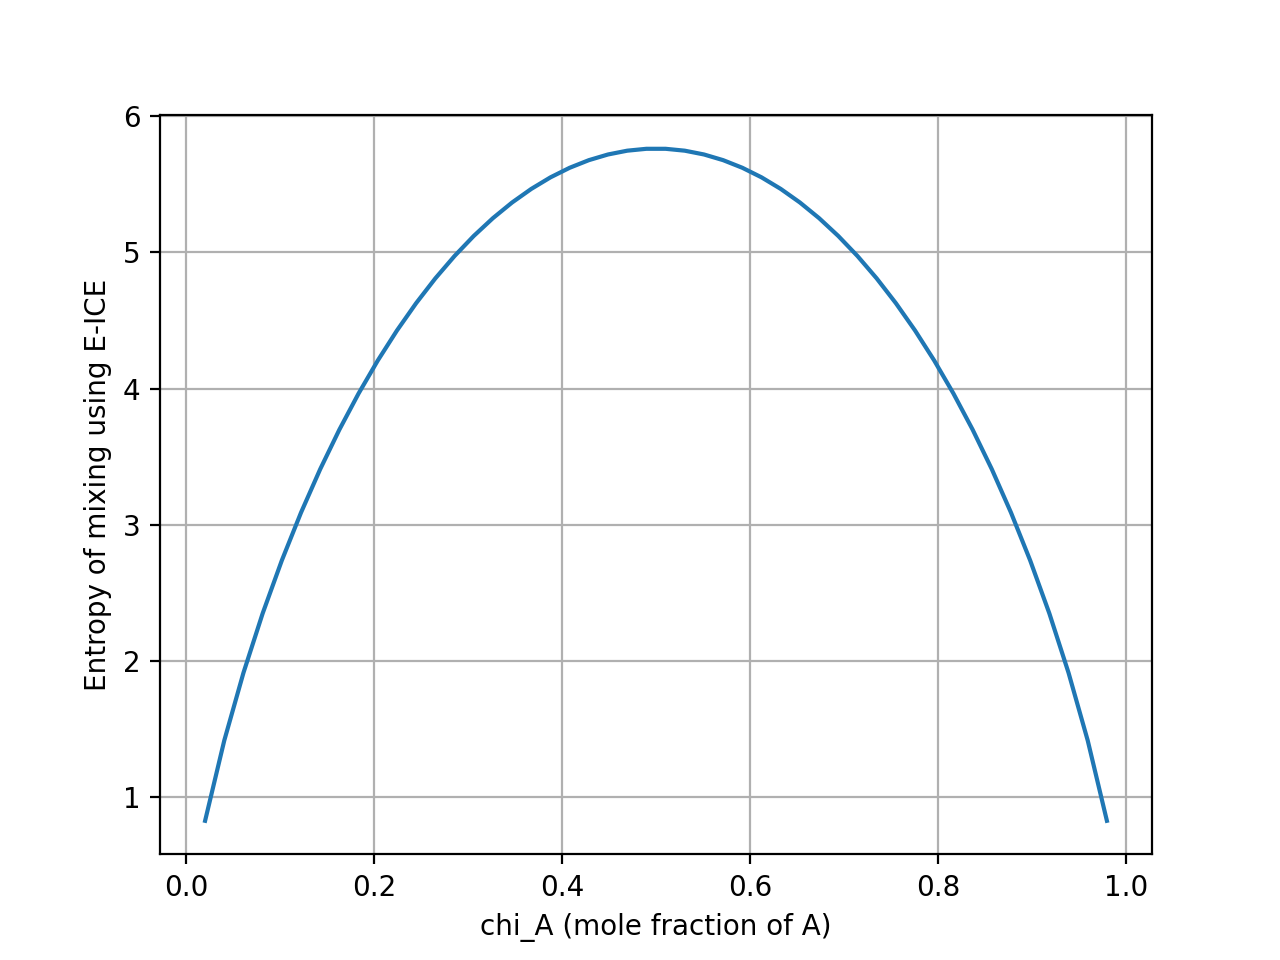

/home/instructor/.local/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: UnitStrippedWarning: The unit of the quantity is stripped when downcasting to ndarray.
  return np.asarray(x, float)


Text(0, 0.5, 'Entropy of mixing using E-ICE')

In [7]:
### BEGIN SOLUTION
VA = AssignQuantity(np.linspace(0,1),'L')
VB = AssignQuantity(np.linspace(1,0),'L')
C = AssignQuantity(1,'mol/L')
nA = C*VA
nB = C*VB
ntot = nA + nB
chiA = nA/ntot
chiB = nB/ntot
DeltaS = -ntot*R*(chiA*np.log(chiA)+chiB*np.log(chiB))
DeltaS.ito('J/K')
plt.figure()
plt.plot(chiA,DeltaS)
plt.grid('True')
plt.xlabel('chi_A (mole fraction of A)')
plt.ylabel('Entropy of mixing using E-ICE')
### END SOLUTION

### Pause for analysis
What's the maximum entropy of mixing? What proportions of reagents give rise to it?

### BEGIN SOLUTION
5.8 J/K, in a 50-50 mixture
### END SOLUTION

### Refresh/save/validate/close/submit/logout